### Feature Importance

> "Backtesting is not a research tool. Feature importance is."
>
> &mdash; Marco's first law of backtesting

This notebook will cover exercise answer.

* Exercise 8.1
* Exercise 8.2
* Exercise 8.3

As we go along, there will be some explanations.

Most of the functions below can be found under Tool/metrics

This chapter itself can be quite heavy as it involves PCA as well as different metric performance measures.

Contact: boyboi86@gmail.com

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import research as rs

%matplotlib inline

Num of CPU core:  4
Machine info:  Windows-10-10.0.18362-SP0
Python 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
Numpy 1.17.3
Pandas 1.0.3


C:\Users\Wei_X\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 1500x800 with 1 Axes>

In [2]:
from sklearn.datasets import make_classification

def test_data(n_features=40, n_informative=10, n_redundant=10, n_samples=10000):
    # generate a random dataset for a classification problem    
    trnsX, cont = make_classification(n_samples=n_samples, n_features=n_features, n_informative=n_informative, n_redundant=n_redundant, random_state=0, shuffle=False)
    df0 = pd.date_range(periods=n_samples, freq=pd.tseries.offsets.BDay(), end=pd.datetime.today())
    trnsX = pd.DataFrame(trnsX, index=df0)
    cont = pd.Series(cont, index=df0).to_frame('bin')
    df0 = ['I_%s' % i for i in range(n_informative)] + ['R_%s' % i for i in range(n_redundant)]
    df0 += ['N_%s' % i for i in range(n_features - len(df0))]
    trnsX.columns = df0
    cont['w'] = 1.0 / cont.shape[0]
    cont['t1'] = pd.Series(cont.index, index=cont.index)
    return trnsX, cont

X, y = test_data(n_features=20, n_informative=5, n_redundant=5, n_samples= 3000)

#Take note of depreciation warning Pandas 1.0.3

C:\Users\Wei_X\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [3]:
X

,I_0,I_1,I_2,I_3,I_4,R_0,R_1,R_2,R_3,R_4,N_0,N_1,N_2,N_3,N_4,N_5,N_6,N_7,N_8,N_9
2008-12-04 18:20:31.630509,-0.737441,1.480017,-1.624384,-0.907109,1.852716,-1.042550,0.206819,-0.282577,0.667836,-1.155404,-0.797706,-0.800303,-1.159210,0.265765,-0.692233,2.031814,-0.545652,0.051393,0.162916,1.003635
2008-12-05 18:20:31.630509,-0.722167,2.694209,-0.848284,1.394876,-0.676037,-1.058662,0.937675,0.242056,0.792361,1.656174,-0.471474,-0.404565,2.293856,1.553295,-0.167588,-1.171582,0.671503,0.355732,0.164742,1.726842
2008-12-08 18:20:31.630509,-2.464807,1.849071,0.021696,3.202498,0.194839,-2.238507,-0.619387,-1.045632,3.676729,-0.283826,1.577428,-1.120976,-0.030646,-1.124057,-0.050032,0.093905,0.748571,-2.892617,-0.797168,1.449732
2008-12-09 18:20:31.630509,1.557030,1.290159,-1.044263,-1.673964,2.077268,0.172160,-1.028541,1.640022,-1.346945,-0.755371,2.145253,-1.026265,0.960892,0.286109,0.209064,0.319532,-0.526978,-0.319982,0.462094,-1.778664
2008-12-10 18:20:31.630509,-0.775799,1.620273,-2.026289,0.775127,0.127839,-1.718214,0.983768,-0.961620,1.657738,-0.341892,-0.344063,0.427022,-1.974068,2.625296,-0.572037,-0.509773,-0.368742,0.004224,-1.598331,-0.807513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-28 18:20:31.630509,-0.581578,-0.049621,-0.198635,2.023424,-0.987298,-1.086323,0.039362,-0.988735,1.902968,-0.125347,1.871046,-1.130525,0.670610,-1.306620,1.700514,-2.019744,-0.808909,-0.727355,0.202766,-1.224024
2020-05-29 18:20:31.630509,2.356476,0.166034,-1.223822,2.711896,-0.787449,-1.425878,-1.627161,0.338701,1.671942,-0.888587,-0.590340,0.171062,-0.029284,-0.736423,0.579844,-0.933117,0.397632,1.639739,-2.382154,0.564313
2020-06-01 18:20:31.630509,0.242724,-0.258967,-0.021133,2.396409,-0.573791,-1.124627,-1.129714,-0.467224,2.034931,-0.728756,-1.415538,0.701067,0.098626,1.530280,0.919778,-1.463967,-1.416195,-0.149276,0.083001,0.089964
2020-06-02 18:20:31.630509,-0.394498,-2.028831,0.196144,2.614800,-0.576834,-1.381691,-1.298519,-1.814296,3.135303,-2.130049,-0.501588,-0.180367,-0.867517,0.067514,-0.552346,0.638024,-0.444415,0.111936,0.936410,0.941215


In [4]:
y #look familiar?

,bin,w,t1
2008-12-04 18:20:31.630509,0,0.000333,2008-12-04 18:20:31.630509
2008-12-05 18:20:31.630509,0,0.000333,2008-12-05 18:20:31.630509
2008-12-08 18:20:31.630509,0,0.000333,2008-12-08 18:20:31.630509
2008-12-09 18:20:31.630509,0,0.000333,2008-12-09 18:20:31.630509
2008-12-10 18:20:31.630509,0,0.000333,2008-12-10 18:20:31.630509
...,...,...,...
2020-05-28 18:20:31.630509,1,0.000333,2020-05-28 18:20:31.630509
2020-05-29 18:20:31.630509,1,0.000333,2020-05-29 18:20:31.630509
2020-06-01 18:20:31.630509,1,0.000333,2020-06-01 18:20:31.630509
2020-06-02 18:20:31.630509,1,0.000333,2020-06-02 18:20:31.630509


In [5]:
X0 = pd.DataFrame(data = rs.o_feat(X), index = X.index).add_prefix("PC_") 

#always make sure your columns are str only when running mp

**Note**

If PCA is new or you are confused. I think this article can further illustrate what we are doing.

[Towards Data Science: PCA using sklearn](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60)

While you are running SFI method using multiprocessing for parallelization, it will improve processing speed greatly but not as much as you think. Its highly dependent on your machine.

For sklearn version 0.23.1, there is some base class and utilities which we can use to improve processing speed.

The below is one of them (Haven't tried it, but it seems legit):

[sklearn/feature_selection/variance_threshold](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html#sklearn.feature_selection.VarianceThreshold)

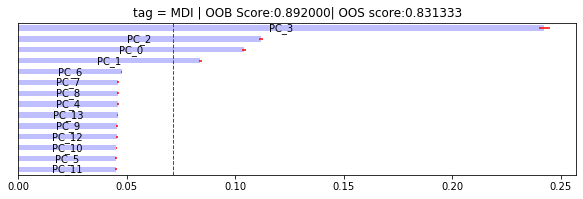

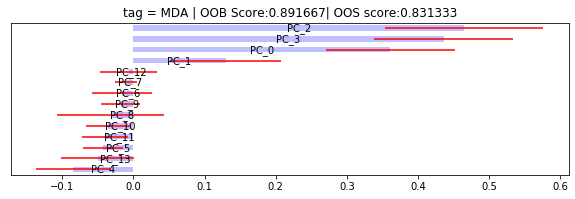

[           mean         std
PC_10  0.448667   0.0100576
PC_11      0.47   0.0114212
PC_12  0.470667    0.012182
PC_13  0.450333  0.00996048] this out


[           mean         std
PC_10  0.448667   0.0100576
PC_11      0.47   0.0114212
PC_12  0.470667    0.012182
PC_13  0.450333  0.00996048,           mean        std
PC_0  0.489333  0.0212122
PC_1  0.467667  0.0188565
PC_2  0.512667  0.0170932
PC_3  0.674667  0.0268254
PC_4  0.439667  0.0113573] this out


[           mean         std
PC_10  0.448667   0.0100576
PC_11      0.47   0.0114212
PC_12  0.470667    0.012182
PC_13  0.450333  0.00996048,           mean        std
PC_0  0.489333  0.0212122
PC_1  0.467667  0.0188565
PC_2  0.512667  0.0170932
PC_3  0.674667  0.0268254
PC_4  0.439667  0.0113573,           mean         std
PC_5     0.462   0.0150422
PC_6     0.446   0.0103688
PC_7  0.463667  0.00938616
PC_8  0.455333   0.0113058
PC_9  0.467667   0.0155924] this out


2020-06-03 18:40:19.381014 100.0% mp_sfi done after 13.93 minutes. Remaining 0.0 minutes.


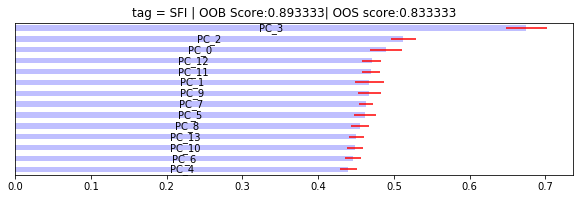

In [6]:
# look at the time require to run 14 columns

rs.feat_imp_analysis(X = X0, 
                     y = y, 
                     sample_weight=y['w'],
                     methods = ['MDI', 'MDA', 'SFI'],
                     events = None,
                     pct_embargo = 0.01,
                     n_splits = 10,
                     min_weight_fraction_leaf = 0.0,
                     n_jobs = 3,
                     scoring = "accuracy",
                     output_path = None,
                     mask_effect = False) # masking effect is False: max_feature = int(1)

### PCA as an unsupervised ML

**MDI:** PC_3, PC_2, PC_0, PC_1 are considered important.

**MDA:** PC_2, PC_3, PC_0, PC_1 are considered important.
    
**SFI:** PC: PC_3, PC_2, PC_0 are considered important. (PC_1 was ranked below PC_12, PC_11)

With reference to the final outcome for the 3 methods: 3, 2, 0 are consistently at the top of the rank.

Firstly, we performed PCA on the initial 20 features to deduce 14 principle components (PC). This reduce dimensionality by dropping features with small eigen-values.

The resulting features/ PC, are considered more "principled" at explaining the structure of data/ samples.

**Conclusion**

This result definitely proves to be more reliable since unsupervised ML (PCA) has no idea on the labels (Less bias), reduced dimensionality of feature matrix proves to be less expensive.

In [7]:
X0 = pd.concat([X0, X], axis=1) # same dataset so can reuse X

X0

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,...,N_0,N_1,N_2,N_3,N_4,N_5,N_6,N_7,N_8,N_9
2008-12-04 18:20:31.630509,0.104914,0.327937,0.606040,1.855273,-0.979098,0.200974,0.647791,-0.389390,-1.322507,-1.090359,...,-0.797706,-0.800303,-1.159210,0.265765,-0.692233,2.031814,-0.545652,0.051393,0.162916,1.003635
2008-12-05 18:20:31.630509,-0.608805,-0.047821,-1.961944,0.814204,-1.052428,1.606602,-1.543159,-1.638999,-0.049770,0.269656,...,-0.471474,-0.404565,2.293856,1.553295,-0.167588,-1.171582,0.671503,0.355732,0.164742,1.726842
2008-12-08 18:20:31.630509,1.765604,1.167851,-1.688129,-0.418782,1.554633,0.115834,-2.359531,0.807408,-1.680377,-0.210083,...,1.577428,-1.120976,-0.030646,-1.124057,-0.050032,0.093905,0.748571,-2.892617,-0.797168,1.449732
2008-12-09 18:20:31.630509,-2.173660,0.937350,1.197696,2.544038,1.662623,0.598929,1.420659,0.868989,-0.718842,1.667454,...,2.145253,-1.026265,0.960892,0.286109,0.209064,0.319532,-0.526978,-0.319982,0.462094,-1.778664
2008-12-10 18:20:31.630509,0.803209,-0.033160,-0.651124,1.108180,-2.126057,0.552412,0.618779,2.030640,-1.623105,-0.830248,...,-0.344063,0.427022,-1.974068,2.625296,-0.572037,-0.509773,-0.368742,0.004224,-1.598331,-0.807513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-28 18:20:31.630509,0.339355,0.278173,-0.342509,-0.162521,1.717780,-0.871551,-0.527051,1.209593,1.178983,2.045547,...,1.871046,-1.130525,0.670610,-1.306620,1.700514,-2.019744,-0.808909,-0.727355,0.202766,-1.224024
2020-05-29 18:20:31.630509,-0.312508,1.581586,0.049642,0.064116,-1.826597,0.630899,-0.771501,1.018517,2.031080,-0.492896,...,-0.590340,0.171062,-0.029284,-0.736423,0.579844,-0.933117,0.397632,1.639739,-2.382154,0.564313
2020-06-01 18:20:31.630509,0.195953,1.119644,-0.118879,-0.513685,-1.398517,-0.393876,0.162924,-0.871914,0.090534,-0.348632,...,-1.415538,0.701067,0.098626,1.530280,0.919778,-1.463967,-1.416195,-0.149276,0.083001,0.089964
2020-06-02 18:20:31.630509,1.376577,1.112966,0.640255,-1.748633,-0.372117,-0.584097,0.154735,-0.619561,-0.439227,-0.560638,...,-0.501588,-0.180367,-0.867517,0.067514,-0.552346,0.638024,-0.444415,0.111936,0.936410,0.941215


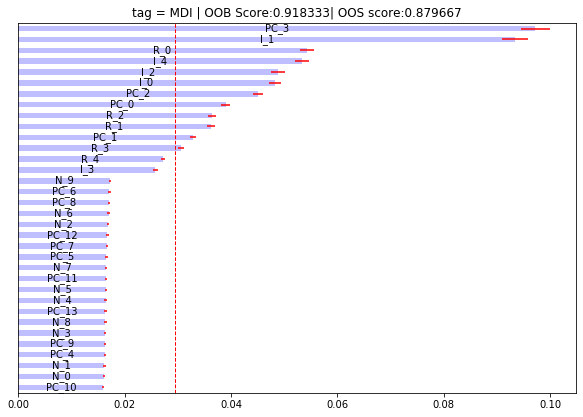

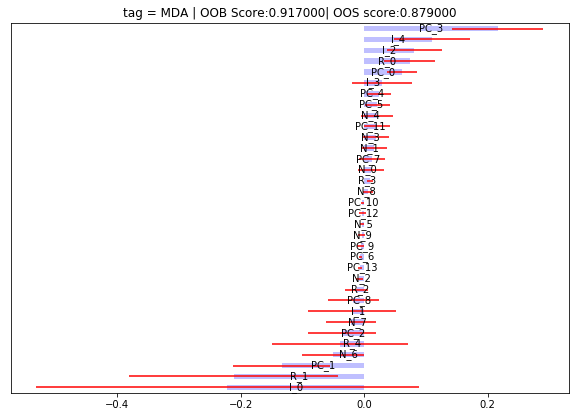

[           mean         std
PC_12  0.470667    0.012182
PC_13  0.450333  0.00996048
I_0       0.512   0.0270933
I_1    0.682667  0.00885438
I_2    0.532333   0.0338134
I_3    0.447667   0.0102312
I_4    0.525333   0.0298224
R_0       0.555   0.0222972
R_1       0.475   0.0161881
R_2    0.484667   0.0163449
R_3    0.481333   0.0138098] this out


[           mean         std
PC_12  0.470667    0.012182
PC_13  0.450333  0.00996048
I_0       0.512   0.0270933
I_1    0.682667  0.00885438
I_2    0.532333   0.0338134
I_3    0.447667   0.0102312
I_4    0.525333   0.0298224
R_0       0.555   0.0222972
R_1       0.475   0.0161881
R_2    0.484667   0.0163449
R_3    0.481333   0.0138098,          mean         std
R_4  0.473667   0.0113573
N_0  0.452667   0.0090652
N_1     0.464   0.0162672
N_2  0.467333   0.0158591
N_3  0.449667   0.0137635
N_4  0.471667  0.00975534
N_5  0.432667  0.00988602
N_6     0.466  0.00946103
N_7  0.455333   0.0107621
N_8  0.468333    0.010025
N_9     0.455   0.0104907] this out


[           mean         std
PC_12  0.470667    0.012182
PC_13  0.450333  0.00996048
I_0       0.512   0.0270933
I_1    0.682667  0.00885438
I_2    0.532333   0.0338134
I_3    0.447667   0.0102312
I_4    0.525333   0.0298224
R_0       0.555   0.0222972
R_1       0.475   0.0161881
R_2    0.484667   0.0163449
R_3    0.481333   0.0138098,          mean         std
R_4  0.473667   0.0113573
N_0  0.452667   0.0090652
N_1     0.464   0.0162672
N_2  0.467333   0.0158591
N_3  0.449667   0.0137635
N_4  0.471667  0.00975534
N_5  0.432667  0.00988602
N_6     0.466  0.00946103
N_7  0.455333   0.0107621
N_8  0.468333    0.010025
N_9     0.455   0.0104907,            mean         std
PC_0   0.489333   0.0212122
PC_1   0.467667   0.0188565
PC_2   0.512667   0.0170932
PC_3   0.674667   0.0268254
PC_4   0.439667   0.0113573
PC_5      0.462   0.0150422
PC_6      0.446   0.0103688
PC_7   0.463667  0.00938616
PC_8   0.455333   0.0113058
PC_9   0.467667   0.0155924
PC_10  0.448667   0.0100576
PC_11      0.

2020-06-03 20:10:41.765237 100.0% mp_sfi done after 31.74 minutes. Remaining 0.0 minutes.


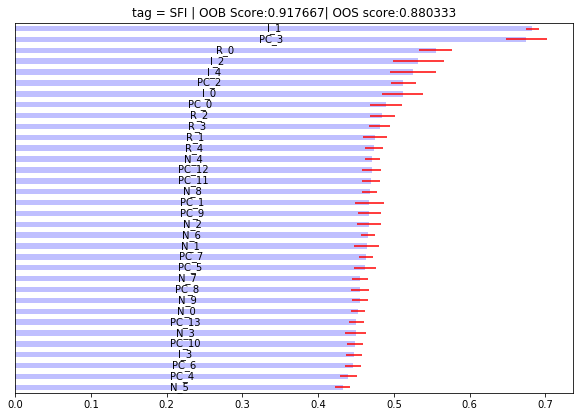

In [8]:
#now i have 34 columns instead of 14 columns, look at the time required when running with 4 cores only.

rs.feat_imp_analysis(X = X0, 
                     y = y, 
                     sample_weight=y['w'],
                     methods = ['MDI', 'MDA', 'SFI'],
                     events = None,
                     pct_embargo = 0.01,
                     n_splits = 10,
                     min_weight_fraction_leaf = 0.0,
                     n_jobs = 3,
                     scoring = "accuracy",
                     output_path = None,
                     mask_effect = False) 

### Mixing features with principle components

**MDI Summary:**

PC: PC_3,PC_2,PC_0, PC_1 are still considered important.

Features: I_1, R_0, I_4, I_0, I_2, R_1, R_2, R_3 are considered important.

For MDI, subsitution effect can be notice as principle components suffered a drop in ranking, however MDI still considered these PCs important. All PCs that was deemed important from initial test are still considered important.

While new features that were informative or redundant were mostly ranked important and above noise features.

With exception to R_4, I_3 which missed marginally from the dotted vertical red line.

**MDA Summary:**

PC: PC_3, PC_0, PC_4, PC_5 only were found above first noise features (N_4).

Features:  I_4, I_1, I_2, R_0, I_3 were still found above first noise features (N_4).

In view of substitution effects, MDA deem critical features as redundant and start to rank noise features higher. When dealing with critical but identical features, MDA will considered them unimportant (Since MDA based performance on Out-of-Sample score). 

As a result PC_2, PC_1 as well as the remaining informative and redundant features were mostly ranked below first noise feature (N_4). 

To make it worse, some of these critical features were deemed unimportant and deterimental to model.

**SFI Summary:** 

PC: PC_3, PC_2, PC_0 are ranked before then first noise feature (N_4) while PC_1 was ranked below N_8 (lower than N_4).

Features: I_3 was the only one that was ranked below first noise feature (N_4), while the remaining informative and redundant features was still above the first noise feature (N_4). (SFI also based performance on Out-of-Sample score).

However, SFI was the only method that ranked first principle feature (I_1) above principle components at the top.

### Conclusion

When features collection suffers high redundancy, substitution effects will reflect in the inconsistent ranking outcome from MDA against the other 2 methods.

With reference to the above, only the below labels was considered important in all 3 methods.

* PC_0
* PC_3
* I_4
* I_1
* I_2

Whenever strong mismatch outcome is observed. 

It is a sign where features collection is suffering from high feature redundancy.

In [9]:
X1 = X0.drop(['PC_0', 'PC_3', 'I_4', 'I_1', 'I_2'], axis = 'columns')

In [10]:
X1

,PC_1,PC_2,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,...,N_0,N_1,N_2,N_3,N_4,N_5,N_6,N_7,N_8,N_9
2008-12-04 18:20:31.630509,0.327937,0.606040,-0.979098,0.200974,0.647791,-0.389390,-1.322507,-1.090359,1.531310,1.040459,...,-0.797706,-0.800303,-1.159210,0.265765,-0.692233,2.031814,-0.545652,0.051393,0.162916,1.003635
2008-12-05 18:20:31.630509,-0.047821,-1.961944,-1.052428,1.606602,-1.543159,-1.638999,-0.049770,0.269656,-0.867187,-0.157241,...,-0.471474,-0.404565,2.293856,1.553295,-0.167588,-1.171582,0.671503,0.355732,0.164742,1.726842
2008-12-08 18:20:31.630509,1.167851,-1.688129,1.554633,0.115834,-2.359531,0.807408,-1.680377,-0.210083,0.966765,1.929211,...,1.577428,-1.120976,-0.030646,-1.124057,-0.050032,0.093905,0.748571,-2.892617,-0.797168,1.449732
2008-12-09 18:20:31.630509,0.937350,1.197696,1.662623,0.598929,1.420659,0.868989,-0.718842,1.667454,-0.285337,0.326614,...,2.145253,-1.026265,0.960892,0.286109,0.209064,0.319532,-0.526978,-0.319982,0.462094,-1.778664
2008-12-10 18:20:31.630509,-0.033160,-0.651124,-2.126057,0.552412,0.618779,2.030640,-1.623105,-0.830248,-0.219950,-1.861995,...,-0.344063,0.427022,-1.974068,2.625296,-0.572037,-0.509773,-0.368742,0.004224,-1.598331,-0.807513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-28 18:20:31.630509,0.278173,-0.342509,1.717780,-0.871551,-0.527051,1.209593,1.178983,2.045547,0.586069,-0.166173,...,1.871046,-1.130525,0.670610,-1.306620,1.700514,-2.019744,-0.808909,-0.727355,0.202766,-1.224024
2020-05-29 18:20:31.630509,1.581586,0.049642,-1.826597,0.630899,-0.771501,1.018517,2.031080,-0.492896,-0.521698,0.585276,...,-0.590340,0.171062,-0.029284,-0.736423,0.579844,-0.933117,0.397632,1.639739,-2.382154,0.564313
2020-06-01 18:20:31.630509,1.119644,-0.118879,-1.398517,-0.393876,0.162924,-0.871914,0.090534,-0.348632,0.101497,-2.099143,...,-1.415538,0.701067,0.098626,1.530280,0.919778,-1.463967,-1.416195,-0.149276,0.083001,0.089964
2020-06-02 18:20:31.630509,1.112966,0.640255,-0.372117,-0.584097,0.154735,-0.619561,-0.439227,-0.560638,0.943997,0.111793,...,-0.501588,-0.180367,-0.867517,0.067514,-0.552346,0.638024,-0.444415,0.111936,0.936410,0.941215


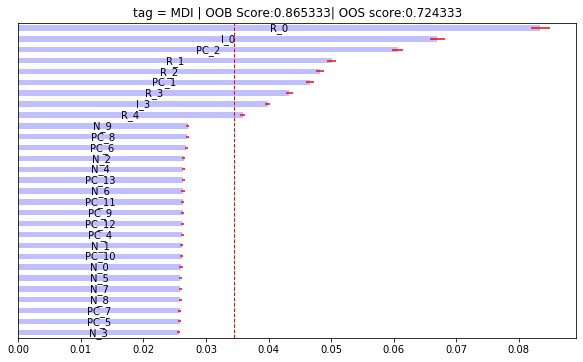

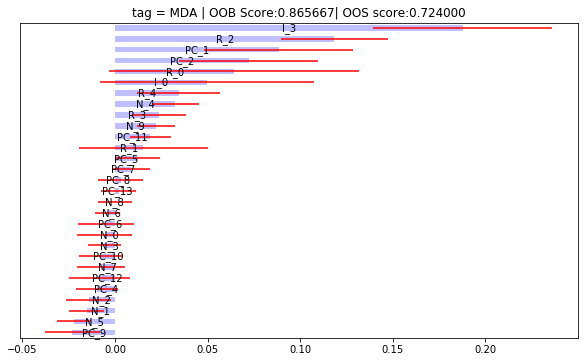

[         mean         std
N_1     0.464   0.0162672
N_2  0.467333   0.0158591
N_3  0.449667   0.0137635
N_4  0.471667  0.00975534
N_5  0.432667  0.00988602
N_6     0.466  0.00946103
N_7  0.455333   0.0107621
N_8  0.468333    0.010025
N_9     0.455   0.0104907] this out


[         mean         std
N_1     0.464   0.0162672
N_2  0.467333   0.0158591
N_3  0.449667   0.0137635
N_4  0.471667  0.00975534
N_5  0.432667  0.00988602
N_6     0.466  0.00946103
N_7  0.455333   0.0107621
N_8  0.468333    0.010025
N_9     0.455   0.0104907,            mean         std
PC_12  0.470667    0.012182
PC_13  0.450333  0.00996048
I_0       0.512   0.0270933
I_3    0.447667   0.0102312
R_0       0.555   0.0222972
R_1       0.475   0.0161881
R_2    0.484667   0.0163449
R_3    0.481333   0.0138098
R_4    0.473667   0.0113573
N_0    0.452667   0.0090652] this out


[         mean         std
N_1     0.464   0.0162672
N_2  0.467333   0.0158591
N_3  0.449667   0.0137635
N_4  0.471667  0.00975534
N_5  0.432667  0.00988602
N_6     0.466  0.00946103
N_7  0.455333   0.0107621
N_8  0.468333    0.010025
N_9     0.455   0.0104907,            mean         std
PC_12  0.470667    0.012182
PC_13  0.450333  0.00996048
I_0       0.512   0.0270933
I_3    0.447667   0.0102312
R_0       0.555   0.0222972
R_1       0.475   0.0161881
R_2    0.484667   0.0163449
R_3    0.481333   0.0138098
R_4    0.473667   0.0113573
N_0    0.452667   0.0090652,            mean         std
PC_1   0.467667   0.0188565
PC_2   0.512667   0.0170932
PC_4   0.439667   0.0113573
PC_5      0.462   0.0150422
PC_6      0.446   0.0103688
PC_7   0.463667  0.00938616
PC_8   0.455333   0.0113058
PC_9   0.467667   0.0155924
PC_10  0.448667   0.0100576
PC_11      0.47   0.0114212] this out


2020-06-03 21:07:17.541403 100.0% mp_sfi done after 28.41 minutes. Remaining 0.0 minutes.


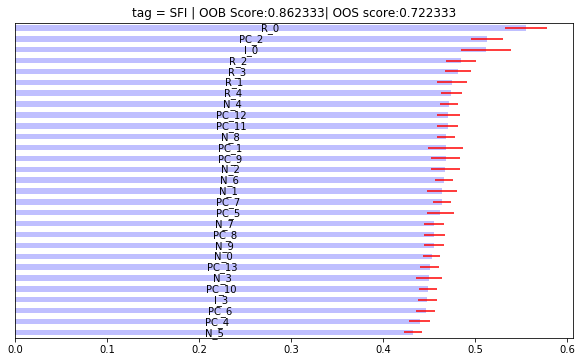

In [11]:
# dropped important labels while using remaining labels to run feat importance.

rs.feat_imp_analysis(X = X1, 
                     y = y, 
                     sample_weight=y['w'],
                     methods = ['MDI', 'MDA', 'SFI'],
                     events = None,
                     pct_embargo = 0.01,
                     n_splits = 10,
                     min_weight_fraction_leaf = 0.0,
                     n_jobs = 3,
                     scoring = "accuracy",
                     output_path = None,
                     mask_effect = False) 

### Removal of key features

After we removed the below important features/ PC: 

1. PC_0, PC_3
2. I_4, I_1, I_2

**MDI Summary:**

PC: PC_2, PC_1 are still considered important (Improvement in ranking).

All informative and redundant features were ranked above noise features, plus all these features (Including PC_2 and PC_1) were considered important.

**MDA Summary:**

PC: PC_2, PC_1 were found above first noise features (N_4).

Features:  I_3, R_2, R_0, I_0, R_4 were still found above first noise features (N_4).

All informative features (including PC_2 and PC_1) were ranked above first noise features. Significant improvement in overall ranking outcome. (Reduction in substitution effects)

**SFI Summary:** 

PC: only PC_2 was ranked before first noise feature (N_4) while PC_1 was still ranked below N_8 (lower than N_4).

Features: R_0, R_2, R_3, R_3, R_4 was the only one that was ranked below first noise feature (N_4), while the remaining informative and redundant features was still above the first noise feature (N_4).

I_3 still remained only one that was ranked below first noise feature (N_4), since SFI derive performance via OOS (Similar to MDA). Hence it can conclude all features are unimportant.

Overall, SFI has the least change/ improvement in terms of feature importance ranking, since SFI does not suffer from substitution effects since individual features are considered one at a time.

### Conclusion

After we removed the common important features among all 3 methods, there is a significant ranking improvement in informative features and principle components that were considered important.

As we removed the important labels, there was also a reduction in substitution effect across the samples. Hence reflecting an improvement in ranking outcome for informative features and key principle components.

With reference to SFI, the improvement seems limited as both I_3 and PC_1 were still considered "unimportant", after removing common "important" features. Both MDA and SFI based performance on OOS, therefore first principle features were able to be ranked at the top and important principle component can be considered "unimportant" (Below Noise features).

At the same time, overall OOB score and OOS score also reduced (This may mean in reduction in overall bias), variance on each features does reflect an increase (Bias vs Variance trade-off).

In short, whenever we believed that features collection are suffering from high substitution effects. Remove the common "important" labels may improve overall reliability of feature importance ranking (Bias reduction), however SFI on the other hand may not experience much improvement since this method is immuned substitution effects.

### Personal opinion

As seen above on the amount of time to run all the codes (even with parallelization).

> Reliable and efficient research result is a combination of 4 key factors:
> 1. your cognitive abilities
> 2. your curiosity
> 3. your data samples
> 4. your tools
>
> When it comes to efficiency, your tools probably takes the cake.
>
> &mdash; Undefeated's first principle of quantitative research